<a href="https://colab.research.google.com/github/Yuliaxx/Dinamica/blob/main/%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-9.45554886
rr= 6.5439103252181265
rr= 6.54391032533667
rr= 6.602796531751665e-09
C= -9.45554886
-9.45554885
rr= 6.543910297910752
rr= 6.543910293284419
rr= 2.5141630999314657e-08


<ipython-input-1-363a059e6ae8>:191: RuntimeWarning: invalid value encountered in scalar divide
  return np.abs(C1(y)/C1(y_0)-1)
<ipython-input-1-363a059e6ae8>:191: RuntimeWarning: divide by zero encountered in scalar divide
  return np.abs(C1(y)/C1(y_0)-1)


Матрица монодромии: [[ 1.23357831e+01 -1.90563115e+00  6.94279178e+01  2.79617160e+02]
 [-9.62497532e+01  8.62549861e+00 -2.77947687e+02 -2.59016190e+03]
 [-1.79933945e+00  1.22208707e-01 -3.45448052e+00 -5.03226703e+01]
 [-3.32873051e-01  5.57318465e-02 -2.02927574e+00 -7.21806883e+00]]
Собственные значения: [8.19238341+0.j         0.98714217+0.15984475j 0.98714217-0.15984475j
 0.1220646 +0.j        ]
собственные вектора: [[-1.92913070e-01+0.00000000e+00j -4.35358143e-04+1.79433981e-02j
  -4.35358143e-04-1.79433981e-02j -1.92396996e-01+0.00000000e+00j]
 [ 9.81074133e-01+0.00000000e+00j  9.99464635e-01+0.00000000e+00j
   9.99464635e-01-0.00000000e+00j -9.81175794e-01+0.00000000e+00j]
 [ 1.56901928e-02+0.00000000e+00j  2.73451525e-02-3.87769101e-07j
   2.73451525e-02+3.87769101e-07j -1.56834914e-02+0.00000000e+00j]
 [ 5.64895218e-03+0.00000000e+00j  2.92060352e-05-7.28409693e-04j
   2.92060352e-05+7.28409693e-04j  5.61122837e-03+0.00000000e+00j]]
Модули собственных значений:  [8.1923834

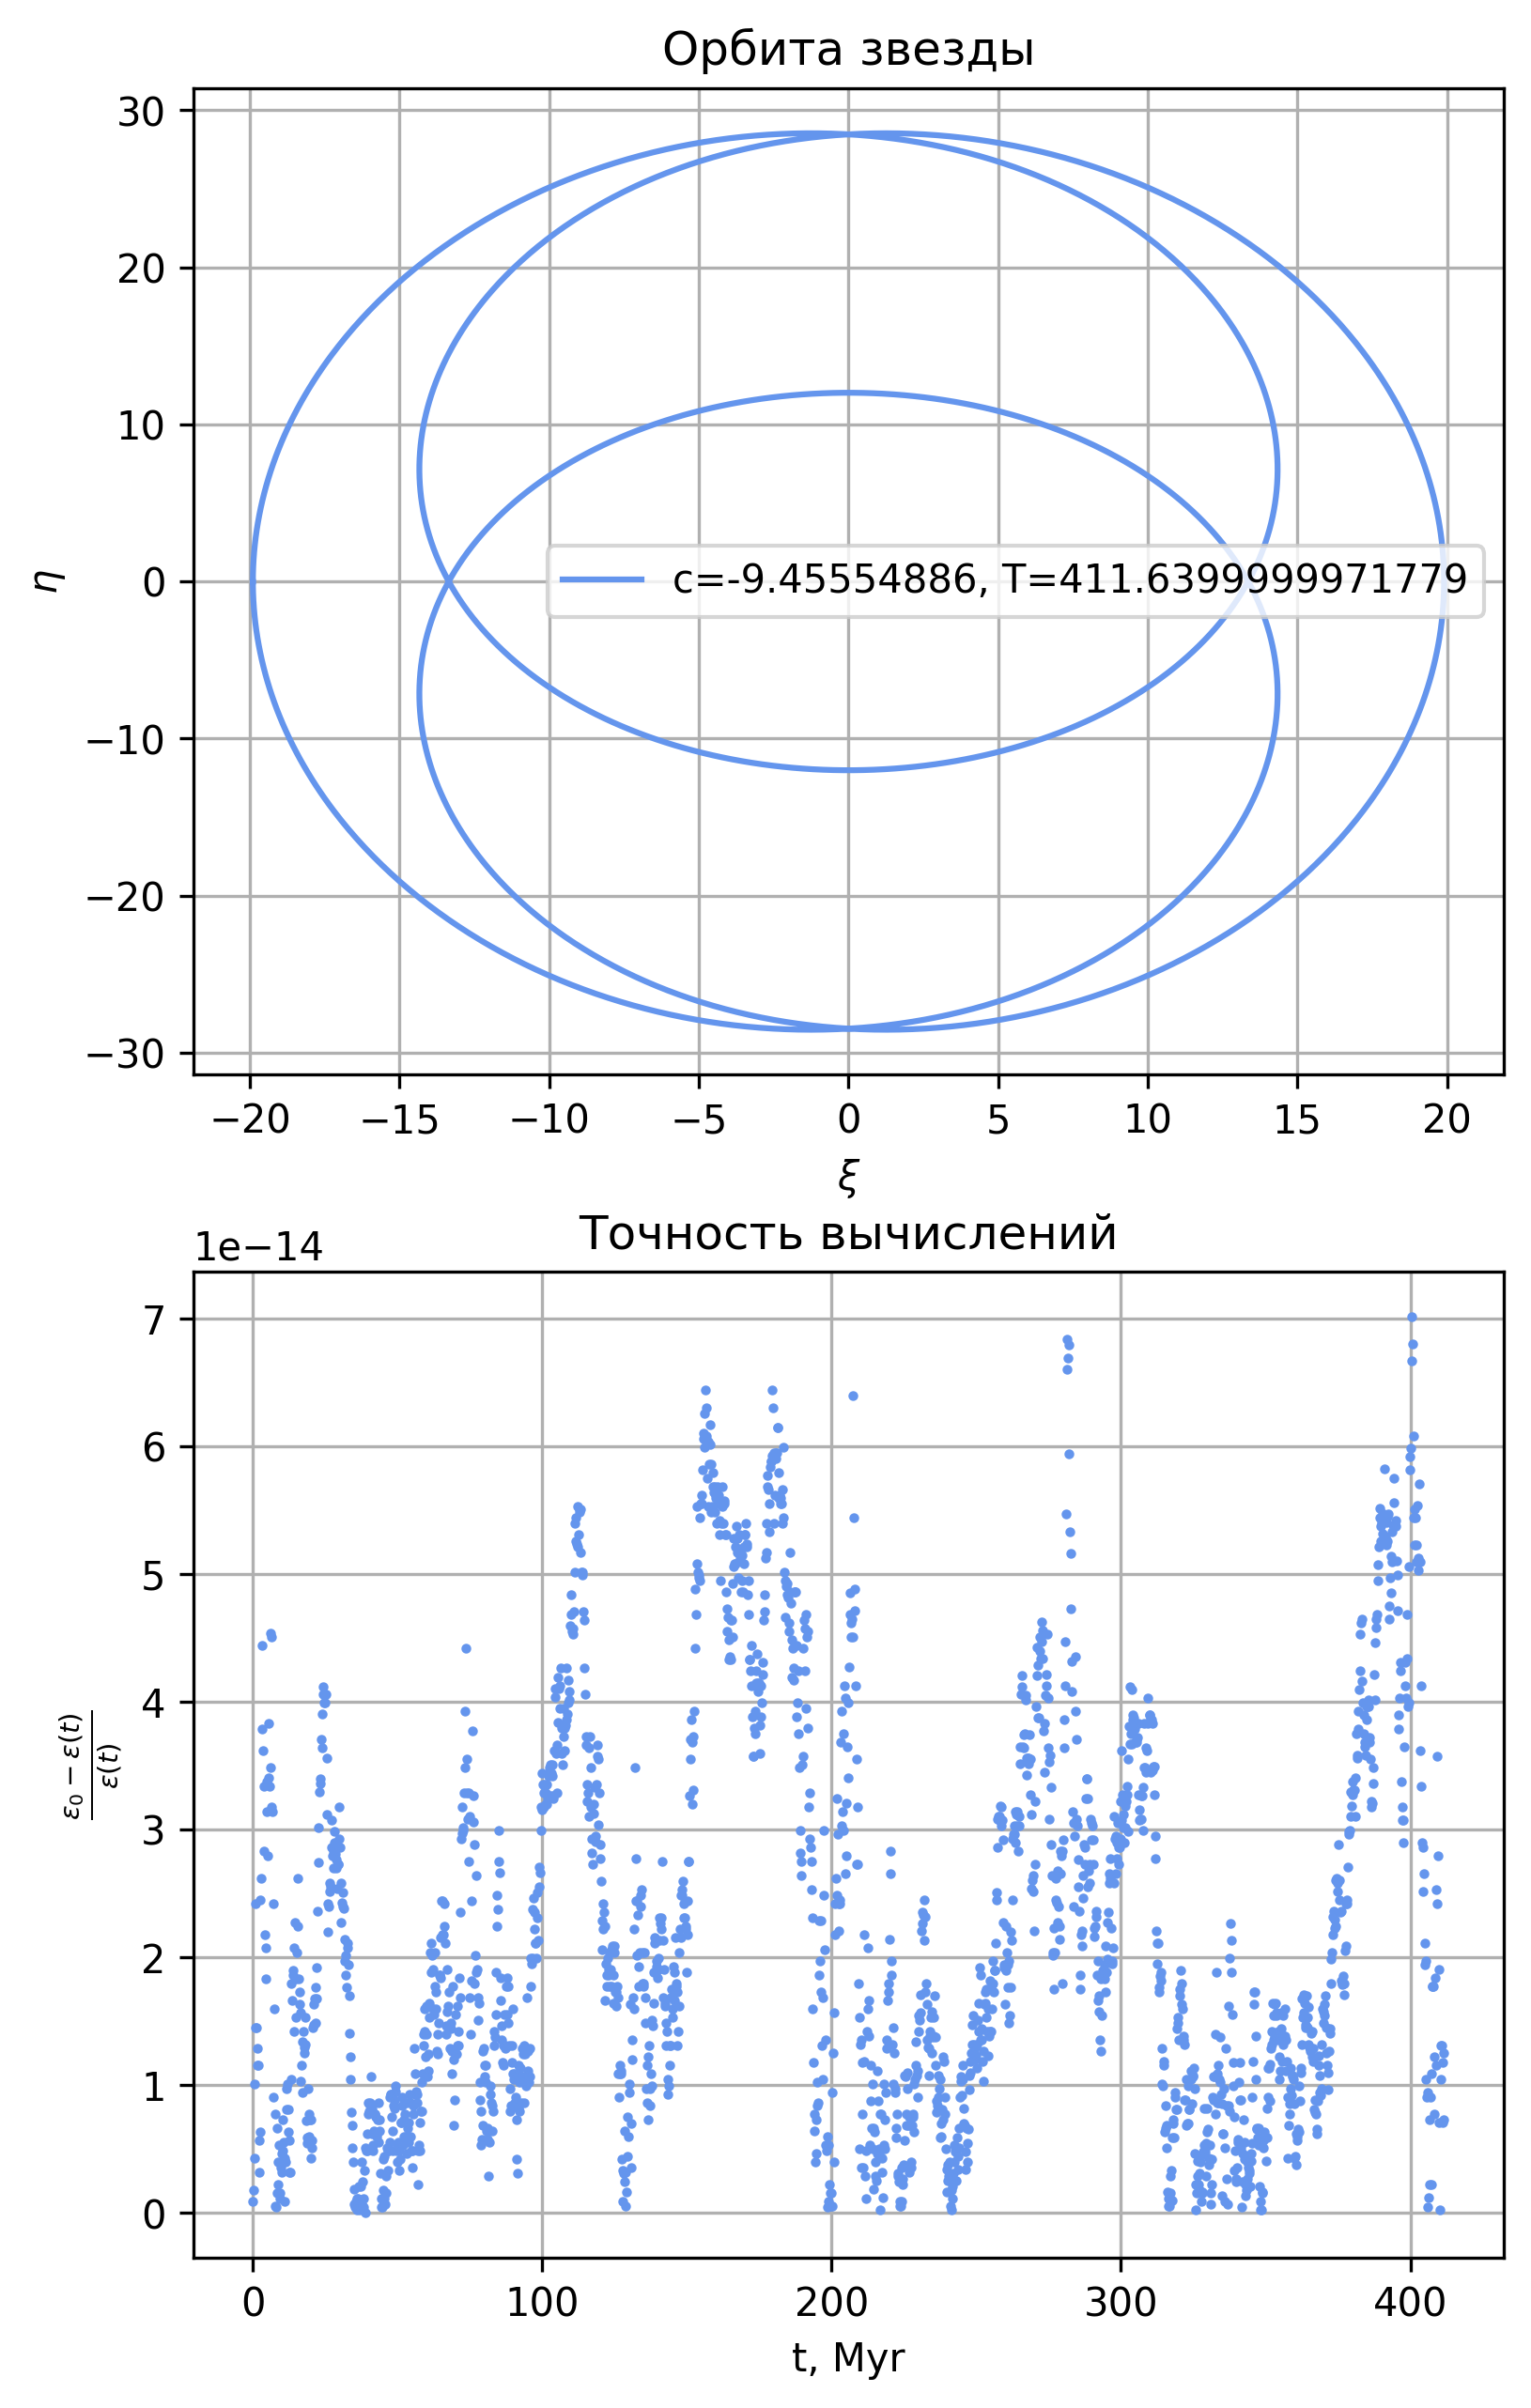

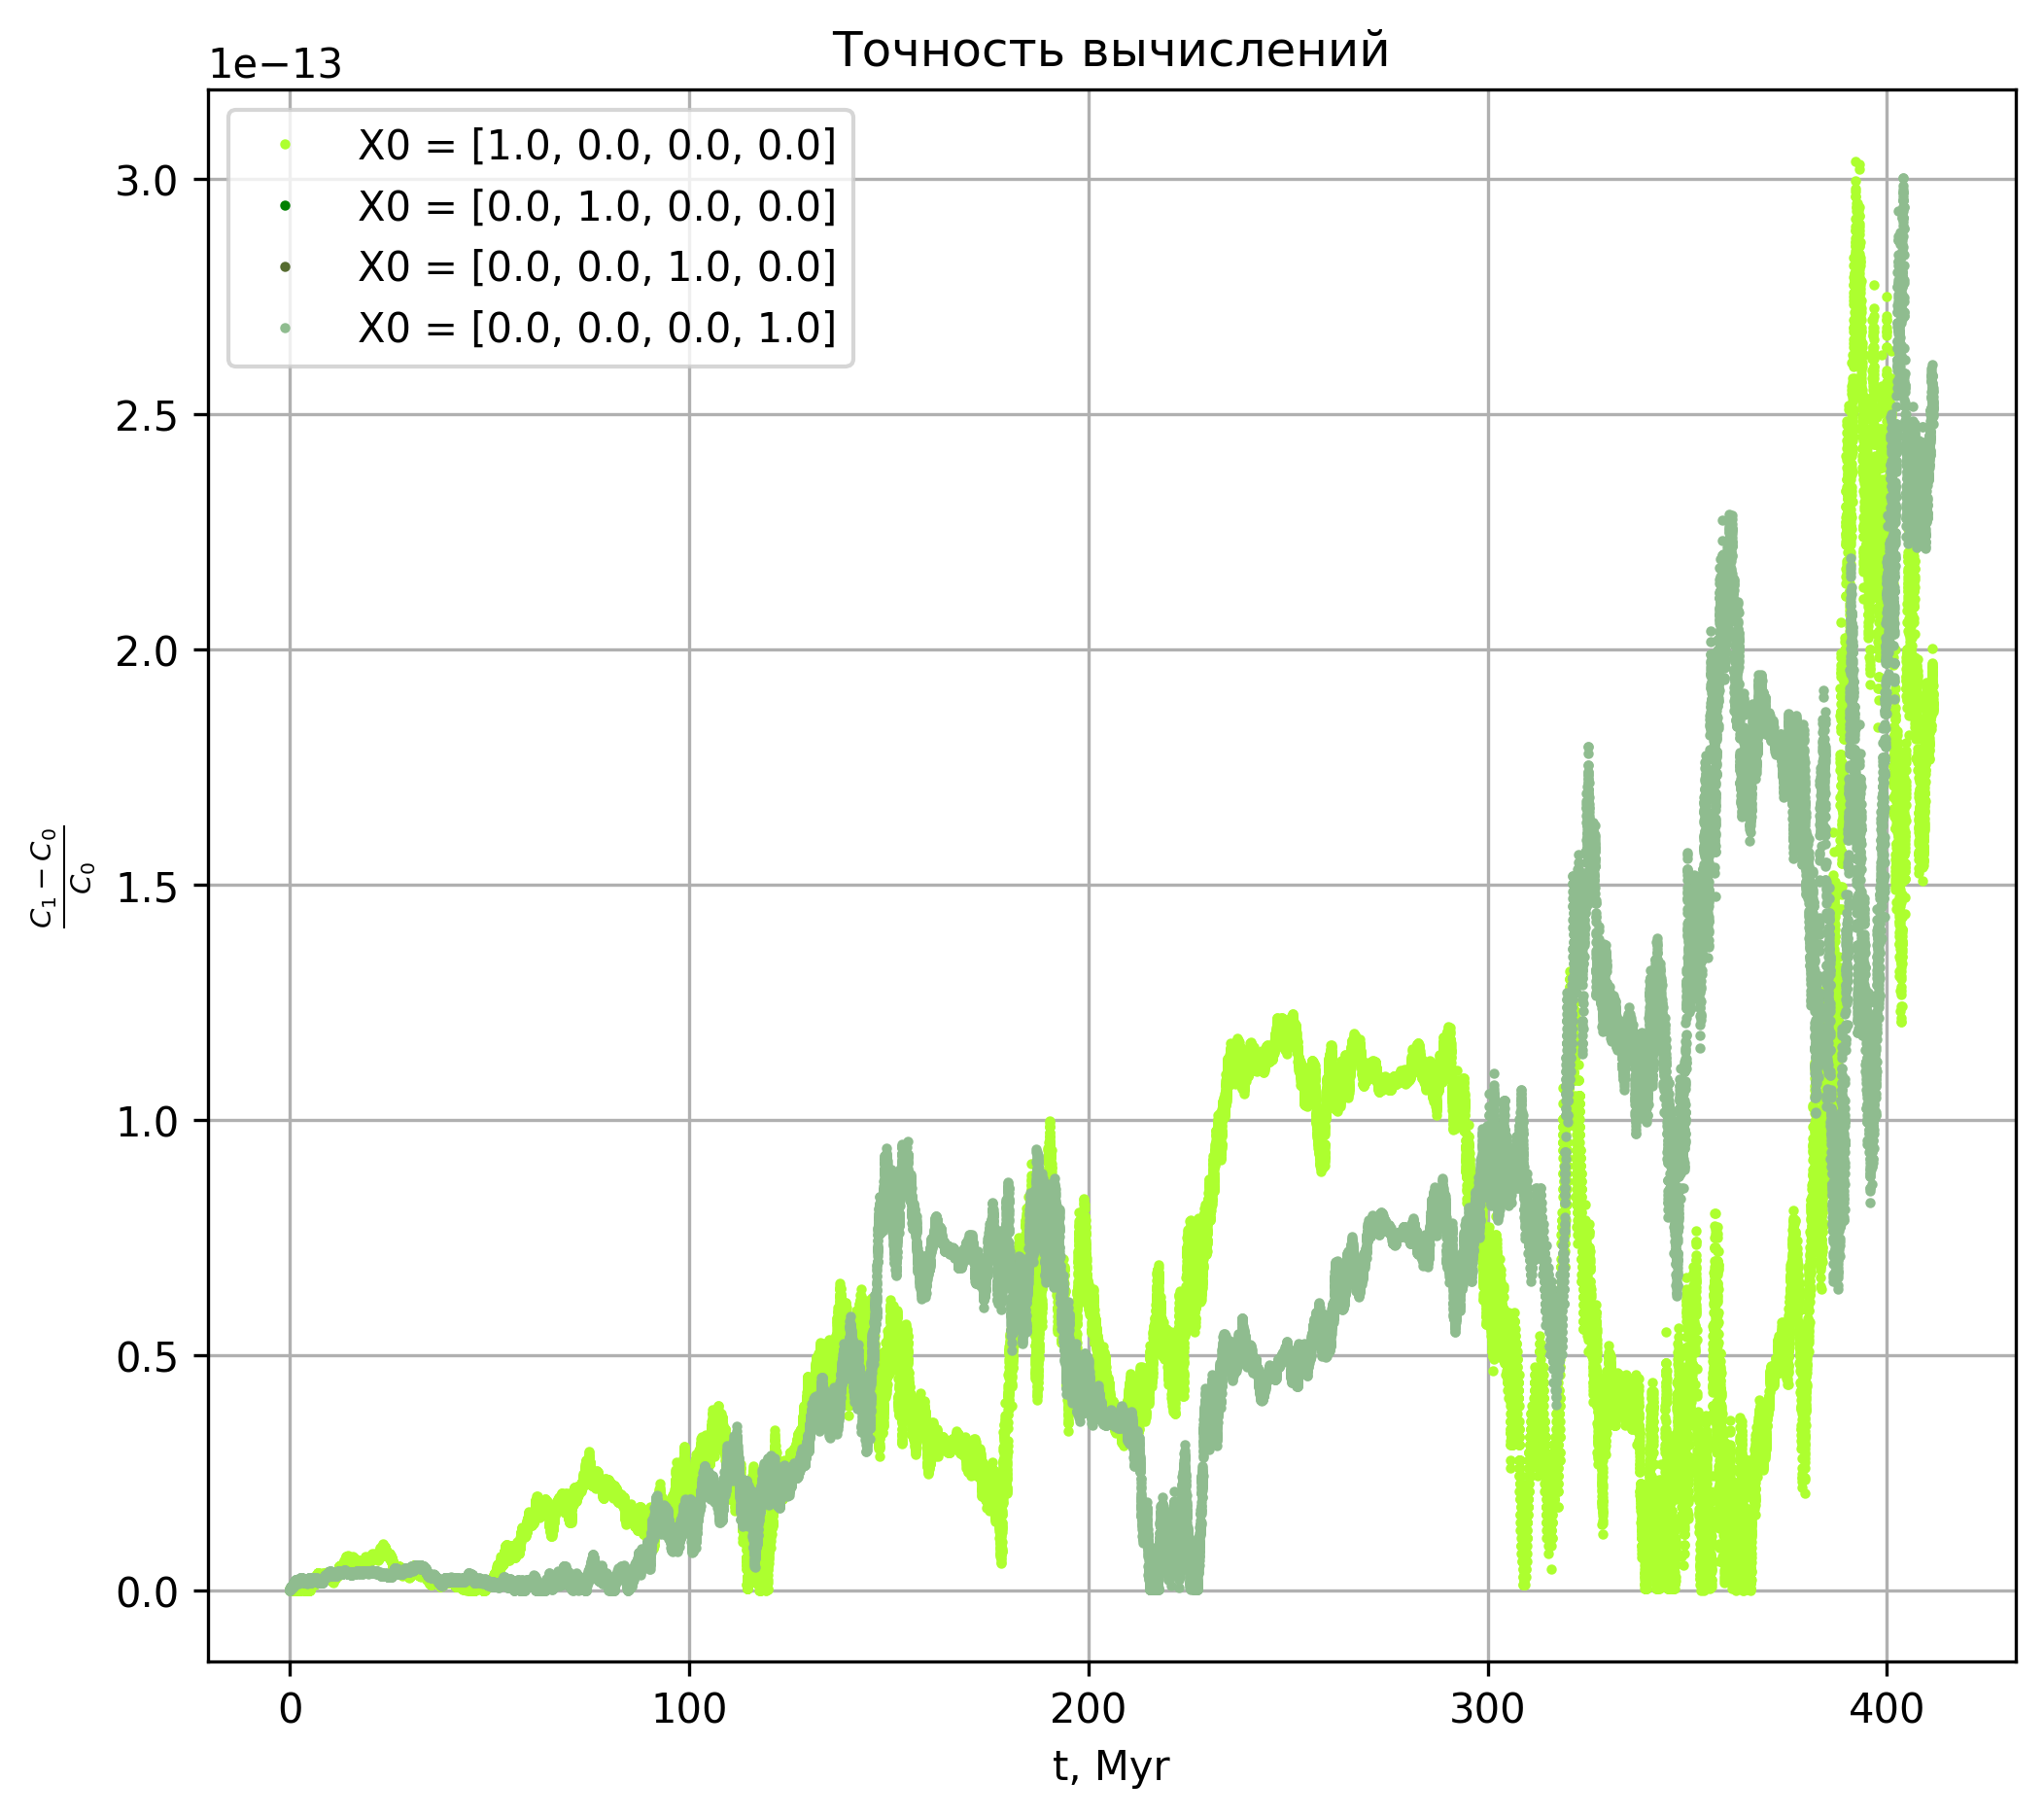

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import RK45
from sphinx.addnodes import index


def eta10(c1): #Вычисляем первую производную эта - начальное значение первой производной (в момент времени 0)
    return np.sqrt(2 * (e1 + G * m2 / ((mu ** 2) * np.abs(ksi0(c1)))) - al1 * ksi0(c1) ** 2)

def ksi0(c): #Вычисляем значение кси при заданной константе с
    return -mod_ksi1t + c

def fksi2(ksi, eta, eta1): #Вычисляем вторую производную кси - это третье уравнение в системе
    return 2*omega*eta1-(G*m2/((mu**2) * r(ksi, eta) ** 3)+al1)*ksi

def feta2(ksi, eta, ksi1): #Вычисляем вторую производную этта - это четвертое уравнение в системе
    return -2*omega*ksi1-G*m2/((mu**2) * r(ksi, eta) ** 3)*eta

def r(ksi, eta): #Вычисляем расстояние по координатам кси и эта - это пятое уравнение в системе
    return np.sqrt(ksi ** 2 + eta ** 2)

def eps(ksi, eta, ksi1, eta1): #Интеграл якоби для контроля точности по энергии
    return (ksi1 ** 2 + eta1 ** 2) / 2. - G * m2 / (mu ** 2 * r(ksi, eta)) + al1 * ksi ** 2 / 2

def check(y):
    ksi, eta, ksi1, eta1 = y
    return np.abs(e1 / eps(ksi, eta, ksi1, eta1) - 1)

def foo(t, y): #Собираем все уравнения в кучу. Массив 4*4
    ksi = y[0]
    eta = y[1]
    ksi1 = y[2]
    eta1 = y[3]
    ksi2 = fksi2(ksi, eta, eta1)
    eta2 = feta2(ksi, eta, ksi1)
    dy = [ksi1, eta1, ksi2, eta2]
    return dy

def look_for_orbit(C): #Ищем предварительную орбиту
    for c in C:
        ksi_0 = ksi0(c)
        eta_0 = 0
        ksi1_0 = 0
        eta1_0 = eta10(c)
        y0 = [ksi_0, eta_0, ksi1_0, eta1_0]
        y_arr = [y0]
        t_arr = [0]

        sol = RK45(fun=foo, t0=0, y0=y0, t_bound=170, max_step=dt)
        while sol.status != 'finished':
            try:
                sol.step()
                _t = sol.t
                y = sol.y
                y_arr.append(y)
                t_arr.append(_t)
            except RuntimeError:
                print('beep')
                break
        y_arr = np.array(y_arr)
        plt.figure(figsize=(13, 12))
        plt.rcParams.update({'font.size': 22})
        plt.title('Орбита звезды', fontsize=22)
        plt.plot(y_arr[:, 0], y_arr[:, 1], '.', markersize=1.5,
                 label='c=' + str(c), color='cornflowerblue')
        plt.legend()
        plt.grid()
        plt.ylabel(r'$\eta$', fontsize=22)
        plt.xlabel(r'$\xi$', fontsize=22)
        plt.savefig(f'c={c}.jpg')
        plt.clf()
        plt.cla()
        plt.close()
        figure(y_arr, t_arr, c)

def figure(y_arr, t_arr, c): #Рисует конечный график
    if len(y_arr) > 4000:
        max_points_n = 2000.
        d_arr = int(len(y_arr)/max_points_n)
        y_arr = np.array(y_arr[::d_arr])
        t_arr = np.array(t_arr[::d_arr])
    else:
        y_arr = np.array(y_arr)
        t_arr = np.array(t_arr)
    delta = [check(i) for i in y_arr]
    delta = np.array(delta)
    fig, axs = plt.subplots(2, figsize=(6, 10), dpi=300)
    axs[0].set_title('Орбита звезды')
    axs[1].set_title('Точность вычислений')
    axs[0].set(xlabel=r'$\xi$', ylabel=r'$\eta$')
    axs[0].plot(y_arr[:, 0], y_arr[:, 1], markersize=3,
                label='c=' + str(np.around(c, 8))+', T='+str(t_arr[-1]), color = 'cornflowerblue')
    axs[1].set(xlabel='t, Myr', ylabel=r'$\frac{\varepsilon_0-\varepsilon(t)}{\varepsilon(t)}$')
    axs[1].plot(t_arr, delta, '.', markersize=3, color = 'cornflowerblue')
    for ax in fig.get_axes():
        ax.grid()
    axs[0].legend(loc='best')
    fig.savefig(f'orbit_{str(np.around(c, 8))}.jpg')


def search(c0, c1, dc, err):
    minr = []
    minc = []
    mint = []
    for c in np.arange(start=c0, stop=c1, step=dc):
    #for c in np.arange(start=c0, stop=c1, step=-dc):
        print('%.8f' % c)
        ksi_0 = ksi0(c)
        eta_0 = 0
        ksi1_0 = 0
        eta1_0 = eta10(c)
        y0 = [ksi_0, eta_0, ksi1_0, eta1_0]
        y_arr = [y0]
        t_arr = [0]
        sol = RK45(fun=foo, t0=0, y0=y0, t_bound=500, max_step=dt)
        i = 0
        while sol.status != 'finished':
            try:
                sol.step()
                i = i + 1
                t = sol.t
                y = sol.y
                y_arr.append(y)
                t_arr.append(t)
                if i < 5000:
                    continue
                if y_arr[i-1][1]*y_arr[i][1] > 0 or y_arr[i][1] < 0:
                    continue
                xp = [y_arr[i - 1][1],y_arr[i][1]]
                fp = [y_arr[i - 1][0], y_arr[i][0]]
                ksi_interp = np.interp(0, xp, fp)
                rr = np.abs(ksi_interp - ksi_0)
                print('rr=', rr)
                if rr > err:
                    continue
                else:
                    print('C=', c)
                    figure(y_arr, t_arr, c)
            except RuntimeError:
                print('beep')
                break


al1 = -0.001976995
G = 0.004535
m1 = 1.
m2 = 499.
mu = 1. + m1 / m2
mod_ksi1t = 10.44666776
omega = 0.02829174
e1t = -3 * G * m2 / (2 * (mu ** 2) * mod_ksi1t)
e1 = -0.5 * e1t
C0 = -20
C1 = -0.1
dt = 1e-3
err_ = 0.01


#search(-6.03168133, -6.03168132, 1e-8 , 1e-8)
search(-9.45554886, -9.45554885, 1e-8 , 1e-8)
#--------------------------------------------------------------------------------------------------------
def beta(ksi, eta):
  return G*m2/(mu**2*r(ksi, eta)**3)

def f_var_ksi2(ksi, eta, var_ksi, var_eta, var_eta1):
  r2 = r(ksi, eta)**2
  b = beta(ksi, eta)
  return 2*omega*var_eta1-var_ksi*(b*(1-3*ksi**2/r2)+al1)+var_eta*3*b*ksi*eta/r2

def f_var_eta2(ksi, eta, var_ksi, var_eta, var_ksi1):
  r2 = r(ksi, eta)**2
  b = beta(ksi, eta)
  return (-2)*omega*var_ksi1+3*b*ksi*eta*var_ksi/r2-b*var_eta*(1-3*eta**2/r2)

def foo2(t, y):
  ksi, eta, ksi1, eta1, var_ksi, var_eta, var_ksi1, var_eta1 = y
  n_ksi1, n_eta1, n_ksi2, n_eta2 = foo(t, [ksi, eta, ksi1, eta1])
  return [n_ksi1, n_eta1, n_ksi2, n_eta2,
          var_ksi1, var_eta1,
          f_var_ksi2(ksi, eta, var_ksi, var_eta, var_eta1),
          f_var_eta2(ksi, eta, var_ksi, var_eta, var_ksi1)]

def C1(y):
  ksi, eta, ksi1, eta1, var_ksi, var_eta, var_ksi1, var_eta1 = y
  br = beta(ksi, eta)
  return ksi1*var_ksi1+eta1*var_eta1+ ksi*var_ksi*(al1+br)+br*eta*var_eta


def check2(y, y_0):
    try:
        return np.abs(C1(y)/C1(y_0)-1)
    except:
        return np.abs(C1(y)-C1(y_0))


#T = 139.518
T = 411.640
#C = -6.03168133
C = -9.45554886
eta_0 = 0.
ksi1_0 = 0.
ksi_0 = ksi0(C)
eta1_0 = eta10(C)
X0_matrix = [[1., 0., 0., 0.], [0., 1., 0., 0.], [0., 0., 1., 0.], [0., 0., 0., 1.]]
X_matrix = []
fig, ax = plt.subplots(1, figsize=(8, 7), dpi=300)
ax.set_title('Точность вычислений')
ax.set(xlabel='t, Myr', ylabel=r'$\frac{C_1-C_0}{C_0}$')
ax.grid()
DELTA =[]
for X0 in X0_matrix:
  y0 = [ksi_0, eta_0, ksi1_0, eta1_0, *X0]
  y_arr = [y0]
  t_arr = [0]
  sol = RK45(fun=foo2, t0=0, y0=y0, t_bound=T, max_step=1e-2)
  while sol.status != 'finished':
    try:
        sol.step()
        t = sol.t
        y = sol.y
        y_arr.append(y)
        t_arr.append(t)
    except RuntimeError:
        print('beep')
        break
  delta = [check2(item, y0) for item in y_arr]                  # расчет контроля энергии
  DELTA.append(delta)
  X_matrix.append(y[4:])                                        # матрица X это значения каждой вариации в последний момент времени (для 4х начальных условий)
  # X - строка строк (var_ksi var_eta var_ksi1 var_eta1)_1, (var_ksi var_eta var_ksi1 var_eta1)_2, (var_ksi var_eta var_ksi1 var_eta1)_3, (var_ksi var_eta var_ksi1 var_eta1)_4
  # np.array(X_matrix) переделали в двумерный массив, в каждой строке свое начальное условие
monodrom = np.array(X_matrix).T                                 # транспонировали этот массив, теперь в каждом столбце свое начальное условие, а в каждой строке разные начальные условия для одной и той же вариации

ax.plot(t_arr, DELTA[0], '.', label=f'X0 = {X0_matrix[0]}', markersize=3, color = 'greenyellow')
ax.plot(t_arr, DELTA[1], '.', label=f'X0 = {X0_matrix[1]}', markersize=3, color = 'green')
ax.plot(t_arr, DELTA[2], '.', label=f'X0 = {X0_matrix[2]}', markersize=3, color = 'darkolivegreen')
ax.plot(t_arr, DELTA[3], '.', label=f'X0 = {X0_matrix[3]}', markersize=3, color = 'darkseagreen')
ax.legend(loc='best')
fig.savefig('Monodrom.jpg')
print('Матрица монодромии:', monodrom)
lam, vec = np.linalg.eig(monodrom)
print('Собственные значения:', lam)
print('Cобственные вектора:', vec)
mod_lam = np.abs(lam)
print('Модули собственных значений: ', mod_lam)
print('Время Ляпунова:', T/np.log(np.max(mod_lam)))
if (np.max(mod_lam)-1)<1e-6:
  print('Орбита устойчива')
else:
  print('Орбита неустойчива')

Матрица монодромии: [[ 1.23357831e+01 -1.90563115e+00  6.94279178e+01  2.79617160e+02]
 [-9.62497532e+01  8.62549861e+00 -2.77947687e+02 -2.59016190e+03]
 [-1.79933945e+00  1.22208707e-01 -3.45448052e+00 -5.03226703e+01]
 [-3.32873051e-01  5.57318465e-02 -2.02927574e+00 -7.21806883e+00]]
Собственные значения: [8.19238341+0.j         0.98714217+0.15984475j 0.98714217-0.15984475j
 0.1220646 +0.j        ]
собственные вектора: [[-1.92913070e-01+0.00000000e+00j -4.35358143e-04+1.79433981e-02j
  -4.35358143e-04-1.79433981e-02j -1.92396996e-01+0.00000000e+00j]
 [ 9.81074133e-01+0.00000000e+00j  9.99464635e-01+0.00000000e+00j
   9.99464635e-01-0.00000000e+00j -9.81175794e-01+0.00000000e+00j]
 [ 1.56901928e-02+0.00000000e+00j  2.73451525e-02-3.87769108e-07j
   2.73451525e-02+3.87769108e-07j -1.56834914e-02+0.00000000e+00j]
 [ 5.64895218e-03+0.00000000e+00j  2.92060352e-05-7.28409693e-04j
   2.92060352e-05+7.28409693e-04j  5.61122837e-03+0.00000000e+00j]]
Модули собственных значений:  [8.1923834

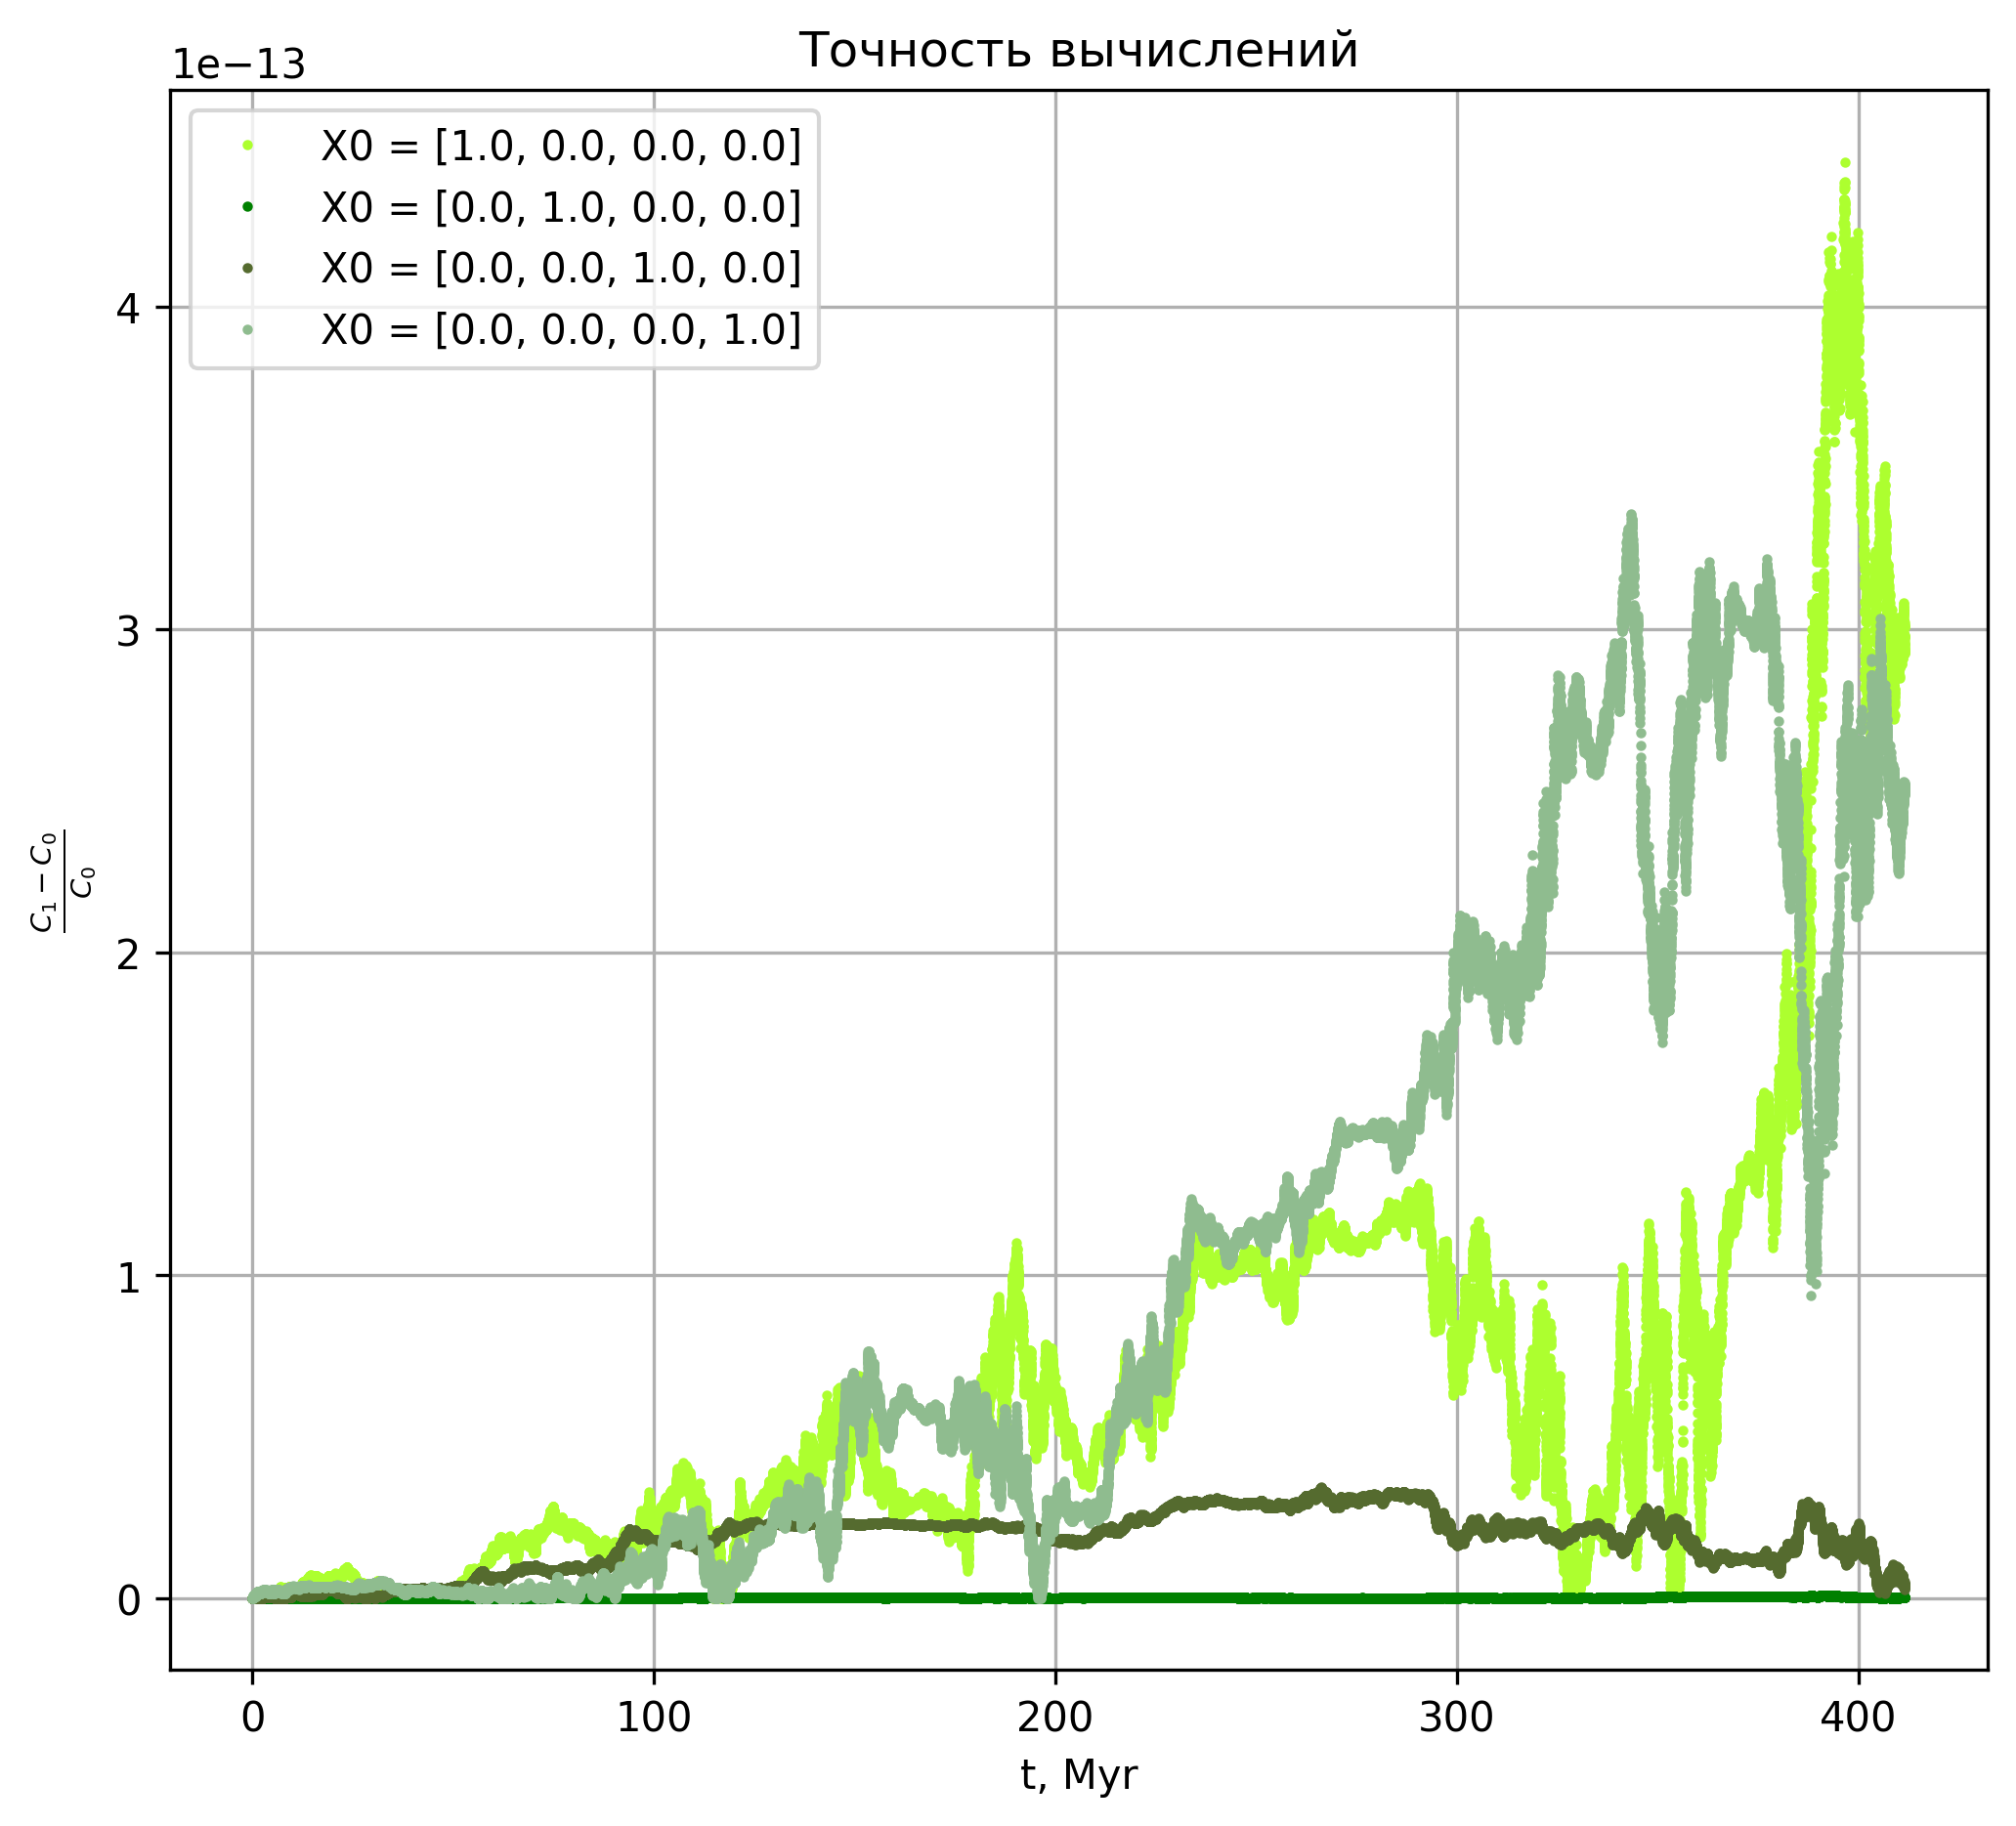

In [18]:
#--------------------------------------------------------------------------------------------------------
def beta(ksi, eta):
  return G*m2/(mu**2*r(ksi, eta)**3)

def f_var_ksi2(ksi, eta, var_ksi, var_eta, var_eta1):
  r2 = r(ksi, eta)**2
  b = beta(ksi, eta)
  return 2*omega*var_eta1-var_ksi*(b*(1-3*ksi**2/r2)+al1)+var_eta*3*b*ksi*eta/r2

def f_var_eta2(ksi, eta, var_ksi, var_eta, var_ksi1):
  r2 = r(ksi, eta)**2
  b = beta(ksi, eta)
  return (-2)*omega*var_ksi1+3*b*ksi*eta*var_ksi/r2-b*var_eta*(1-3*eta**2/r2)

def foo2(t, y):
  ksi, eta, ksi1, eta1, var_ksi, var_eta, var_ksi1, var_eta1 = y
  n_ksi1, n_eta1, n_ksi2, n_eta2 = foo(t, [ksi, eta, ksi1, eta1])
  return [n_ksi1, n_eta1, n_ksi2, n_eta2,
          var_ksi1, var_eta1,
          f_var_ksi2(ksi, eta, var_ksi, var_eta, var_eta1),
          f_var_eta2(ksi, eta, var_ksi, var_eta, var_ksi1)]

def C1(y):
  ksi, eta, ksi1, eta1, var_ksi, var_eta, var_ksi1, var_eta1 = y
  br = beta(ksi, eta)
  return ksi1*var_ksi1+eta1*var_eta1+ ksi*var_ksi*(al1+br)+br*eta*var_eta


def check2(y, y_0):
    try:
        return np.abs(C1(y)/C1(y_0)-1)
    except:
        return np.abs(C1(y)-C1(y_0))


#T = 139.518
T = 411.640
#C = -6.03168133
C = -9.45554886
eta_0 = 0.
ksi1_0 = 0.
ksi_0 = ksi0(C)
eta1_0 = eta10(C)
X0_matrix = [[1., 0., 0., 0.], [0., 1., 0., 0.], [0., 0., 1., 0.], [0., 0., 0., 1.]]
X_matrix = []
fig, ax = plt.subplots(1, figsize=(8, 7), dpi=300)
ax.set_title('Точность вычислений')
ax.set(xlabel='t, Myr', ylabel=r'$\frac{C_1-C_0}{C_0}$')
ax.grid()
DELTA =[]
for X0 in X0_matrix:
  y0 = [ksi_0, eta_0, ksi1_0, eta1_0, *X0]
  y_arr = [y0]
  t_arr = [0]
  sol = RK45(fun=foo2, t0=0, y0=y0, t_bound=T, max_step=1e-2)
  while sol.status != 'finished':
    try:
        sol.step()
        t = sol.t
        y = sol.y
        y_arr.append(y)
        t_arr.append(t)
    except RuntimeError:
        print('beep')
        break
  delta = [check2(item, y0) for item in y_arr]                  # расчет контроля энергии
  DELTA.append(delta)
  X_matrix.append(y[4:])                                        # матрица X это значения каждой вариации в последний момент времени (для 4х начальных условий)
  # X - строка строк (var_ksi var_eta var_ksi1 var_eta1)_1, (var_ksi var_eta var_ksi1 var_eta1)_2, (var_ksi var_eta var_ksi1 var_eta1)_3, (var_ksi var_eta var_ksi1 var_eta1)_4
  # np.array(X_matrix) переделали в двумерный массив, в каждой строке свое начальное условие
monodrom = np.array(X_matrix).T                                 # транспонировали этот массив, теперь в каждом столбце свое начальное условие, а в каждой строке разные начальные условия для одной и той же вариации

ax.plot(t_arr, DELTA[0], '.', label=f'X0 = {X0_matrix[0]}', markersize=3, color = 'greenyellow')
ax.plot(t_arr, DELTA[1], '.', label=f'X0 = {X0_matrix[1]}', markersize=3, color = 'green')
ax.plot(t_arr, DELTA[2], '.', label=f'X0 = {X0_matrix[2]}', markersize=3, color = 'darkolivegreen')
ax.plot(t_arr, DELTA[3], '.', label=f'X0 = {X0_matrix[3]}', markersize=3, color = 'darkseagreen')
ax.legend(loc='best')
fig.savefig('Monodrom.jpg')
print('Матрица монодромии:', monodrom)
lam, vec = np.linalg.eig(monodrom)
print('Собственные значения:', lam)
print('собственные вектора:', vec)
mod_lam = np.abs(lam)
print('Модули собственных значений: ', mod_lam)
print('Время Ляпунова:', T/np.log(np.max(mod_lam)))
if (np.max(mod_lam)-1)<1e-6:
  print('Орбита устойчива')
else:
  print('Орбита неустойчива')